## Installing api 

In [2]:
# installing api yahoo finance for get date
!pip install yfinance
!pip install matplotlib
!pip install statsmodels
!pip install pyinform

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
from pyinform.transferentropy import transfer_entropy

## 1 - Download commodity data (1y)

In [4]:
commodities = ['KC=F', 'SB=F', 'PL=F', '^VIX']  # Coffee, Sugar , Platinum, VIX
data = yf.download(commodities, start='2023-08-13', end='2024-08-13')
data.to_csv('data.csv')

[*********************100%%**********************]  4 of 4 completed


In [5]:
data

Price        Adj Close                                         Close  \
Ticker            KC=F        PL=F       SB=F       ^VIX        KC=F   
Date                                                                   
2023-08-14  151.100006  900.099976  24.049999  14.820000  151.100006   
2023-08-15  149.250000  885.900024  23.770000  16.459999  149.250000   
2023-08-16  148.899994  885.299988  24.190001  16.780001  148.899994   
2023-08-17  147.000000  889.599976  24.000000  17.889999  147.000000   
2023-08-18  147.449997  909.200012  23.760000  17.299999  147.449997   
...                ...         ...        ...        ...         ...   
2024-08-06  235.949997  915.400024  17.870001  27.709999  235.949997   
2024-08-07  246.300003  924.099976  18.139999  27.850000  246.300003   
2024-08-08  245.300003  934.299988  18.570000  23.790001  245.300003   
2024-08-09  234.050003  927.599976  18.480000  20.370001  234.050003   
2024-08-12  240.850006  945.099976  18.290001  20.709999  240.850006   

Price                                               High              ...  \
Ticker            PL=F       SB=F       ^VIX        KC=F        PL=F  ...   
Date                                                                  ...   
2023-08-14  900.099976  24.049999  14.820000  158.300003  900.099976  ...   
2023-08-15  885.900024  23.770000  16.459999  151.300003  885.900024  ...   
2023-08-16  885.299988  24.190001  16.780001  150.750000  885.299988  ...   
2023-08-17  889.599976  24.000000  17.889999  150.050003  889.599976  ...   
2023-08-18  909.200012  23.760000  17.299999  149.399994  909.200012  ...   
...                ...        ...        ...         ...         ...  ...   
2024-08-06  915.400024  17.870001  27.709999  238.850006  915.400024  ...   
2024-08-07  924.099976  18.139999  27.850000  248.000000  924.099976  ...   
2024-08-08  934.299988  18.570000  23.790001  251.750000  934.299988  ...   
2024-08-09  927.599976  18.480000  20.370001  246.050003  928.299988  ...   
2024-08-12  945.099976  18.290001  20.709999  249.449997  945.099976  ...   

Price             Low                   Open                         \
Ticker           SB=F       ^VIX        KC=F        PL=F       SB=F   
Date                                                                  
2023-08-14  23.930000  14.770000  157.500000  900.099976  24.299999   
2023-08-15  23.700001  14.910000  150.850006  885.900024  24.030001   
2023-08-16  23.629999  15.800000  149.750000  885.299988  23.770000   
2023-08-17  23.940001  16.400000  148.949997  889.599976  24.250000   
2023-08-18  23.670000  17.139999  146.949997  909.200012  24.000000   
...               ...        ...         ...         ...        ...   
2024-08-06  17.770000  24.020000  229.850006  911.299988  18.100000   
2024-08-07  17.799999  21.969999  235.350006  924.099976  17.870001   
2024-08-08  17.950001  23.360001  245.250000  934.299988  18.080000   
2024-08-09  18.309999  20.260000  245.300003  928.299988  18.500000   
2024-08-12  18.230000  18.889999  245.500000  945.099976  18.520000   

Price                 Volume                   
Ticker           ^VIX   KC=F PL=F   SB=F ^VIX  
Date                                           
2023-08-14  15.880000  21142  8.0  36146  0.0  
2023-08-15  14.950000  11857  8.0  49609  0.0  
2023-08-16  16.540001   8371  2.0  48301  0.0  
2023-08-17  16.959999   4999  2.0  81306  0.0  
2023-08-18  17.799999   4867  2.0  57344  0.0  
...               ...    ...  ...    ...  ...  
2024-08-06  33.709999  31484  1.0  44374  0.0  
2024-08-07  24.770000  40125  1.0  37380  0.0  
2024-08-08  28.340000  37129  1.0  69026  0.0  
2024-08-09  23.780001  44484  2.0  42028  0.0  
2024-08-12  20.790001  25849  2.0  34125  0.0  

[252 rows x 24 columns]

In [6]:
# for others destinys
coffee = yf.Ticker('KC=F')
sugar = yf.Ticker('SB=F')
platinum = yf.Ticker('PL=F')
vix = yf.Ticker('^VIX')

In [7]:
data

Price        Adj Close                                         Close  \
Ticker            KC=F        PL=F       SB=F       ^VIX        KC=F   
Date                                                                   
2023-08-14  151.100006  900.099976  24.049999  14.820000  151.100006   
2023-08-15  149.250000  885.900024  23.770000  16.459999  149.250000   
2023-08-16  148.899994  885.299988  24.190001  16.780001  148.899994   
2023-08-17  147.000000  889.599976  24.000000  17.889999  147.000000   
2023-08-18  147.449997  909.200012  23.760000  17.299999  147.449997   
...                ...         ...        ...        ...         ...   
2024-08-06  235.949997  915.400024  17.870001  27.709999  235.949997   
2024-08-07  246.300003  924.099976  18.139999  27.850000  246.300003   
2024-08-08  245.300003  934.299988  18.570000  23.790001  245.300003   
2024-08-09  234.050003  927.599976  18.480000  20.370001  234.050003   
2024-08-12  240.850006  945.099976  18.290001  20.709999  240.850006   

Price                                               High              ...  \
Ticker            PL=F       SB=F       ^VIX        KC=F        PL=F  ...   
Date                                                                  ...   
2023-08-14  900.099976  24.049999  14.820000  158.300003  900.099976  ...   
2023-08-15  885.900024  23.770000  16.459999  151.300003  885.900024  ...   
2023-08-16  885.299988  24.190001  16.780001  150.750000  885.299988  ...   
2023-08-17  889.599976  24.000000  17.889999  150.050003  889.599976  ...   
2023-08-18  909.200012  23.760000  17.299999  149.399994  909.200012  ...   
...                ...        ...        ...         ...         ...  ...   
2024-08-06  915.400024  17.870001  27.709999  238.850006  915.400024  ...   
2024-08-07  924.099976  18.139999  27.850000  248.000000  924.099976  ...   
2024-08-08  934.299988  18.570000  23.790001  251.750000  934.299988  ...   
2024-08-09  927.599976  18.480000  20.370001  246.050003  928.299988  ...   
2024-08-12  945.099976  18.290001  20.709999  249.449997  945.099976  ...   

Price             Low                   Open                         \
Ticker           SB=F       ^VIX        KC=F        PL=F       SB=F   
Date                                                                  
2023-08-14  23.930000  14.770000  157.500000  900.099976  24.299999   
2023-08-15  23.700001  14.910000  150.850006  885.900024  24.030001   
2023-08-16  23.629999  15.800000  149.750000  885.299988  23.770000   
2023-08-17  23.940001  16.400000  148.949997  889.599976  24.250000   
2023-08-18  23.670000  17.139999  146.949997  909.200012  24.000000   
...               ...        ...         ...         ...        ...   
2024-08-06  17.770000  24.020000  229.850006  911.299988  18.100000   
2024-08-07  17.799999  21.969999  235.350006  924.099976  17.870001   
2024-08-08  17.950001  23.360001  245.250000  934.299988  18.080000   
2024-08-09  18.309999  20.260000  245.300003  928.299988  18.500000   
2024-08-12  18.230000  18.889999  245.500000  945.099976  18.520000   

Price                 Volume                   
Ticker           ^VIX   KC=F PL=F   SB=F ^VIX  
Date                                           
2023-08-14  15.880000  21142  8.0  36146  0.0  
2023-08-15  14.950000  11857  8.0  49609  0.0  
2023-08-16  16.540001   8371  2.0  48301  0.0  
2023-08-17  16.959999   4999  2.0  81306  0.0  
2023-08-18  17.799999   4867  2.0  57344  0.0  
...               ...    ...  ...    ...  ...  
2024-08-06  33.709999  31484  1.0  44374  0.0  
2024-08-07  24.770000  40125  1.0  37380  0.0  
2024-08-08  28.340000  37129  1.0  69026  0.0  
2024-08-09  23.780001  44484  2.0  42028  0.0  
2024-08-12  20.790001  25849  2.0  34125  0.0  

[252 rows x 24 columns]

In [8]:
def plot_simple(data, price, ticker, ylabel):
    data[price][ticker].plot(title=f'Price [{price}][{ticker}] vs Time', ylabel = ylabel)

In [9]:
data

Price        Adj Close                                         Close  \
Ticker            KC=F        PL=F       SB=F       ^VIX        KC=F   
Date                                                                   
2023-08-14  151.100006  900.099976  24.049999  14.820000  151.100006   
2023-08-15  149.250000  885.900024  23.770000  16.459999  149.250000   
2023-08-16  148.899994  885.299988  24.190001  16.780001  148.899994   
2023-08-17  147.000000  889.599976  24.000000  17.889999  147.000000   
2023-08-18  147.449997  909.200012  23.760000  17.299999  147.449997   
...                ...         ...        ...        ...         ...   
2024-08-06  235.949997  915.400024  17.870001  27.709999  235.949997   
2024-08-07  246.300003  924.099976  18.139999  27.850000  246.300003   
2024-08-08  245.300003  934.299988  18.570000  23.790001  245.300003   
2024-08-09  234.050003  927.599976  18.480000  20.370001  234.050003   
2024-08-12  240.850006  945.099976  18.290001  20.709999  240.850006   

Price                                               High              ...  \
Ticker            PL=F       SB=F       ^VIX        KC=F        PL=F  ...   
Date                                                                  ...   
2023-08-14  900.099976  24.049999  14.820000  158.300003  900.099976  ...   
2023-08-15  885.900024  23.770000  16.459999  151.300003  885.900024  ...   
2023-08-16  885.299988  24.190001  16.780001  150.750000  885.299988  ...   
2023-08-17  889.599976  24.000000  17.889999  150.050003  889.599976  ...   
2023-08-18  909.200012  23.760000  17.299999  149.399994  909.200012  ...   
...                ...        ...        ...         ...         ...  ...   
2024-08-06  915.400024  17.870001  27.709999  238.850006  915.400024  ...   
2024-08-07  924.099976  18.139999  27.850000  248.000000  924.099976  ...   
2024-08-08  934.299988  18.570000  23.790001  251.750000  934.299988  ...   
2024-08-09  927.599976  18.480000  20.370001  246.050003  928.299988  ...   
2024-08-12  945.099976  18.290001  20.709999  249.449997  945.099976  ...   

Price             Low                   Open                         \
Ticker           SB=F       ^VIX        KC=F        PL=F       SB=F   
Date                                                                  
2023-08-14  23.930000  14.770000  157.500000  900.099976  24.299999   
2023-08-15  23.700001  14.910000  150.850006  885.900024  24.030001   
2023-08-16  23.629999  15.800000  149.750000  885.299988  23.770000   
2023-08-17  23.940001  16.400000  148.949997  889.599976  24.250000   
2023-08-18  23.670000  17.139999  146.949997  909.200012  24.000000   
...               ...        ...         ...         ...        ...   
2024-08-06  17.770000  24.020000  229.850006  911.299988  18.100000   
2024-08-07  17.799999  21.969999  235.350006  924.099976  17.870001   
2024-08-08  17.950001  23.360001  245.250000  934.299988  18.080000   
2024-08-09  18.309999  20.260000  245.300003  928.299988  18.500000   
2024-08-12  18.230000  18.889999  245.500000  945.099976  18.520000   

Price                 Volume                   
Ticker           ^VIX   KC=F PL=F   SB=F ^VIX  
Date                                           
2023-08-14  15.880000  21142  8.0  36146  0.0  
2023-08-15  14.950000  11857  8.0  49609  0.0  
2023-08-16  16.540001   8371  2.0  48301  0.0  
2023-08-17  16.959999   4999  2.0  81306  0.0  
2023-08-18  17.799999   4867  2.0  57344  0.0  
...               ...    ...  ...    ...  ...  
2024-08-06  33.709999  31484  1.0  44374  0.0  
2024-08-07  24.770000  40125  1.0  37380  0.0  
2024-08-08  28.340000  37129  1.0  69026  0.0  
2024-08-09  23.780001  44484  2.0  42028  0.0  
2024-08-12  20.790001  25849  2.0  34125  0.0  

[252 rows x 24 columns]

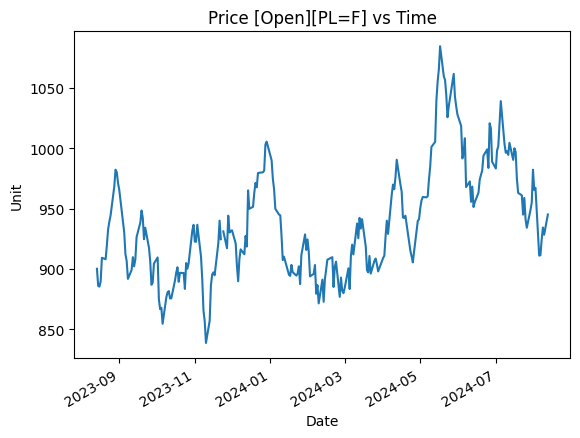

In [10]:
plot_simple(data, 'Open', 'PL=F', ylabel='Unit')

### Meaning of each term
- Adj Close: O preço de fechamento ajustado. É o preço de fechamento de uma ação ou commodity, ajustado por qualquer evento corporativo, como dividendos ou desdobramentos (splits). Para commodities, reflete o valor final levando em consideração ajustes que podem impactar o preço.
- Close: O preço de fechamento do ativo no final do dia de negociação, sem ajustes.
- High: O preço mais alto registrado durante o dia de negociação.
- Low: O preço mais baixo registrado durante o dia de negociação.
- Open: O preço de abertura no início do dia de negociação.
- Volume: O volume de negociação, ou seja, o número total de contratos ou ações negociadas durante o dia.

## 2 - Data processing

In [11]:
def verify_nan(df):
    # Encontrar valores NaN
    nan_locations = df.isna()
    
    cont_nan = 0
    for row_idx, row in nan_locations.iterrows():
        for col_idx, is_nan in row.items():
            if is_nan:
                # Exibindo o índice do DataFrame e a localização do NaN
                print(f'Index: {row_idx}\tColumn: {col_idx}')
                cont_nan += 1

    print(f'Quantity: {cont_nan}')
    result = cont_nan == 0
    return result

In [12]:
verify_nan(data)

Index: 2023-11-23 00:00:00	Column: ('Adj Close', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('Adj Close', '^VIX')
Index: 2023-11-23 00:00:00	Column: ('Close', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('Close', '^VIX')
Index: 2023-11-23 00:00:00	Column: ('High', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('High', '^VIX')
Index: 2023-11-23 00:00:00	Column: ('Low', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('Low', '^VIX')
Index: 2023-11-23 00:00:00	Column: ('Open', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('Open', '^VIX')
Index: 2023-11-23 00:00:00	Column: ('Volume', 'PL=F')
Index: 2023-11-23 00:00:00	Column: ('Volume', '^VIX')
Quantity: 12


False

### Fill in the holes in the timestamp


In [13]:
len(data)

252

In [14]:
data = data.dropna()  # Usando apenas o preço ajustado e removendo NaNs
# Dropou apenas o dia 23/11/2023. Não sei porque, mas os commodities do VIX e PL=F são NaN 
# a API tira os feriados de forma automatica

In [15]:
len(data)

251

Como tratar buracos no mercado financeiro?

In [16]:
verify_nan(data)

Quantity: 0


True

### Get all stock info


In [17]:
print(platinum.info['exchange'])
# NYM - New York Mercantile Exchange (NYMEX)

#     Descrição: A New York Mercantile Exchange, ou NYMEX, é uma bolsa de valores de futuros e commodities localizada em Nova York. É uma das principais bolsas do mundo para negociação de contratos futuros de commodities como petróleo, gás natural, ouro, prata e metais preciosos.

NYM


In [18]:
print(coffee.info['exchange'])
# NYB - New York Board of Trade (NYBOT)

#     Descrição: A New York Board of Trade, ou NYBOT, era uma bolsa de futuros e commodities localizada em Nova York. Em 2006, a NYBOT foi adquirida pela Intercontinental Exchange (ICE). Antes da aquisição, a NYBOT era conhecida por negociar commodities agrícolas e de outros tipos, como café, açúcar e algodão.

NYB


## 3 - Autocorrelation Analysis

In [19]:
def plot(data, price, lags, type_analysis):


    if type_analysis == 'acf':
        for column in data[price].columns:
            plot_acf(data[price][column], lags=lags)
            plt.title(f'Autocorrelation Function (ACF) -  {column}')
            plt.show()
    elif type_analysis == 'pacf':
        for column in data[price].columns:
            plot_pacf(data[price][column], lags=lags)
            plt.title(f'Partial Autocorrelation Function (PACF) -  {column}')
            plt.show()

    elif type_analysis == 'hist':
        for column in data[price].columns:
            plt.hist(data[price][column], bins=30, edgecolor='black')
            plt.title(f'Series Histogram - {column}')
            plt.xlabel(price)
            plt.ylabel('Frequency')
            plt.show()

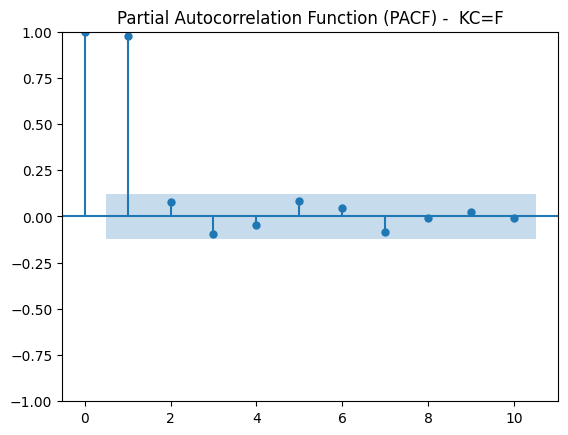

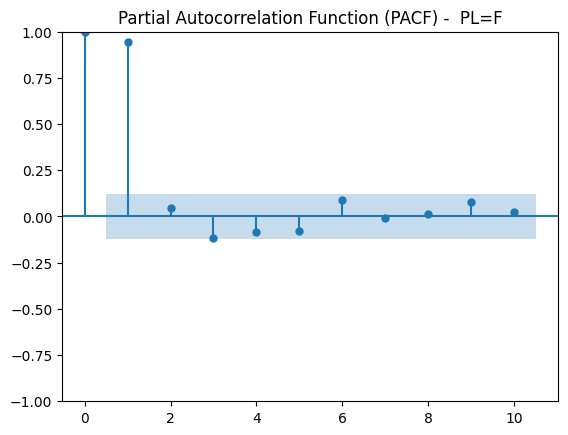

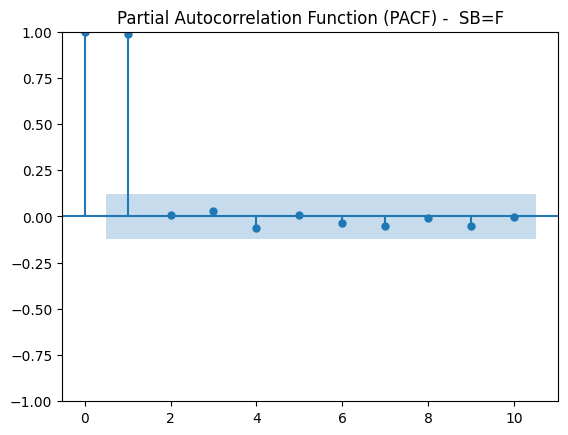

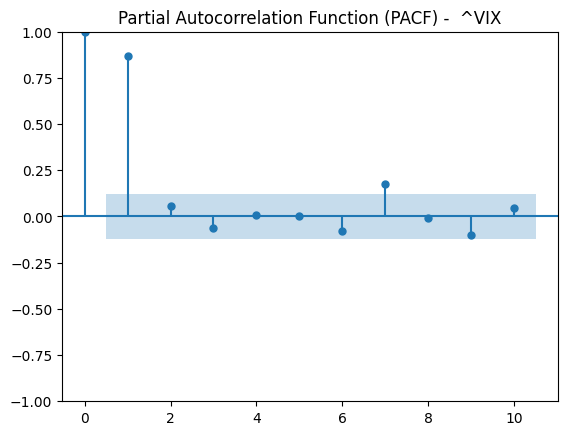

In [20]:
plot(data, 'Close', 10, 'pacf')

A *Função de Autocorrelação (ACF)* mede a correlação entre os valores de uma série temporal em diferentes lags. A ACF ajuda a identificar a força e a direção da relação entre os valores em diferentes momentos no tempo.

Aqui está o passo a passo detalhado para calcular a ACF:

### 1. *Entendimento Básico da ACF*

- *Autocorrelação*: É a correlação de uma série temporal com uma versão atrasada (lagged) de si mesma.
- *Lag*: O número de períodos de deslocamento. Por exemplo, lag 1 significa que estamos correlacionando a série com uma versão dela atrasada em 1 período.

### 2. *Fórmula da ACF*

Para uma série temporal $X = [x_1, x_2, \ldots, x_N]$ com $N$ observações, a autocorrelação para um lag $k$ é dada por:

\begin{equation}
\text{ACF}(k) = \frac{\sum_{t=k+1}^{N} (x_t - \bar{x})(x_{t-k} - \bar{x})}{\sum_{t=1}^{N} (x_t - \bar{x})^2}
\end{equation}


onde:
- $\bar{x}$ é a média da série $X$.
- $k$ é o lag.

### 3. *Passo a Passo para Calcular a ACF*

#### Passo 1: Calcular a Média da Série Temporal

Calcule a média $\bar{x}$ da série temporal:

\begin{equation}
\bar{x} = \frac{1}{N} \sum_{t=1}^{N} x_t
\end{equation}

#### Passo 2: Calcular a Autocovariância para Cada Lag $k$

Para cada lag $k$, calcule a autocovariância:

\begin{equation}
\gamma_k = \frac{1}{N-k} \sum_{t=k+1}^{N} (x_t - \bar{x})(x_{t-k} - \bar{x})
\end{equation}

A autocovariância mede a covariância da série com ela mesma após ser atrasada por $k$ períodos.

#### Passo 3: Calcular a Variância da Série Temporal

Calcule a variância da série temporal:

\begin{equation}
\gamma_0 = \frac{1}{N} \sum_{t=1}^{N} (x_t - \bar{x})^2
\end{equation}


A variância $\gamma_0$ é a autocovariância para $k=0$, ou seja, sem atraso.

#### Passo 4: Calcular a ACF para Cada Lag $k$

Finalmente, a autocorrelação para um lag $k$ é dada por:

\begin{equation}
\text{ACF}(k) = \frac{\gamma_k}{\gamma_0}
\end{equation}


### 4. *Exemplo Prático*

Vamos supor que você tenha a seguinte série temporal com 5 observações:

\begin{equation}
X = [1, 2, 3, 4, 5]
\end{equation}


#### Passo 1: Calcular a Média

\begin{equation}
\bar{x} = \frac{1 + 2 + 3 + 4 + 5}{5} = 3
\end{equation}


#### Passo 2: Calcular a Autocovariância para Cada Lag $k$

Para $k=1$:

\begin{equation}
\gamma_1 = \frac{1}{5-1} \sum_{t=2}^{5} (x_t - 3)(x_{t-1} - 3)
\end{equation}


Substituindo os valores:

\begin{equation}
\gamma_1 = \frac{1}{4} \left[ (2-3)(1-3) + (3-3)(2-3) + (4-3)(3-3) + (5-3)(4-3) \right] 
\end{equation}


\begin{equation}
\gamma_1 = \frac{1}{4} \left[ 2 + 0 + 0 + 2 \right] = \frac{4}{4} = 1
\end{equation}


#### Passo 3: Calcular a Variância

\begin{equation}
\gamma_0 = \frac{1}{5} \sum_{t=1}^{5} (x_t - 3)^2 = \frac{1}{5} \left[ (1-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (5-3)^2 \right]
\end{equation}


\begin{equation}
\gamma_0 = \frac{1}{5} \left[ 4 + 1 + 0 + 1 + 4 \right] = \frac{10}{5} = 2
\end{equation}


#### Passo 4: Calcular a ACF

Para $k=1$:

\begin{equation}
\text{ACF}(1) = \frac{\gamma_1}{\gamma_0} = \frac{1}{2} = 0.5
\end{equation}


### 5. *Interpretação da ACF*

- *ACF positiva*: Indica que um valor alto em um tempo anterior tende a ser seguido por um valor alto em um tempo posterior.
- *ACF negativa*: Indica que um valor alto em um tempo anterior tende a ser seguido por um valor baixo em um tempo posterior.
- *Magnitude*: A magnitude da ACF indica a força da correlação.

A ACF é uma ferramenta fundamental para identificar padrões temporais, como sazonalidade e tendências, e para modelar séries temporais usando técnicas como ARIMA.

Claro! A Função de Autocorrelação Parcial (PACF) é uma ferramenta importante em análise de séries temporais. Ela mede a correlação entre uma série temporal e uma versão atrasada de si mesma, removendo o efeito das lags intermediários. Em outras palavras, a PACF mostra a correlação direta entre a série e os seus lags, descontando as influências dos lags intermediários.

Aqui está um passo a passo detalhado para calcular a PACF:

### 1. **Entendimento Básico da PACF**

- **Autocorrelação Parcial (PACF)**: A PACF mede a correlação direta entre a série temporal e suas versões atrasadas, removendo o efeito das lags intermediários.
- **Lag**: O número de períodos de deslocamento. Por exemplo, lag 1 significa que estamos correlacionando a série com uma versão dela atrasada em 1 período, mas descontando a influência dos períodos intermediários.

### 2. **Fórmula da PACF**

Para calcular a PACF, usamos o conceito de autocorrelação parcial, que pode ser obtida através da solução de um sistema de equações lineares conhecido como equações de Yule-Walker. A fórmula direta para o cálculo da PACF não é tão simples quanto a da ACF, pois envolve a resolução de um modelo autoregressivo.

### 3. **Passo a Passo para Calcular a PACF**

#### Passo 1: Calcular a ACF

Calcule a Função de Autocorrelação (ACF) para a série temporal para determinar a correlação total para cada lag.

#### Passo 2: Ajustar um Modelo AR

A PACF é a função de autocorrelação de um modelo autoregressivo (AR). Para calcular a PACF para um determinado lag \( k \), ajuste um modelo AR com ordem \( k \) e use os coeficientes estimados desse modelo.

#### Passo 3: Calcular a PACF

A PACF para um lag \( k \) pode ser obtida a partir dos coeficientes do modelo AR ajustado. Em geral, a PACF para um lag \( k \) é o coeficiente de regressão do modelo AR de ordem \( k \) para o lag \( k \). 

### Exemplo Prático

Suponha que você tenha a mesma série temporal com 5 observações:

\[ X = [1, 2, 3, 4, 5] \]

#### Passo 1: Calcular a ACF

Siga o mesmo processo que você descreveu anteriormente para calcular a ACF para diferentes lags. Digamos que você calculou a ACF e obteve:

- \(\text{ACF}(1) = 0.5\)
- \(\text{ACF}(2) = 0.3\)

#### Passo 2: Ajustar um Modelo AR

Para calcular a PACF, ajustamos um modelo AR (Autorregressivo) à série. Por exemplo, ajuste um modelo AR(2) à série \(X\) e obtenha os coeficientes estimados.

#### Passo 3: Obter Coeficientes da PACF

A partir do modelo AR ajustado, você obterá os coeficientes das regressões. Esses coeficientes representam a PACF para cada lag.

Por exemplo, se ajustamos um modelo AR(2) e obtemos os seguintes coeficientes para os lags:

- Para \(k=1\): \(\phi_1\)
- Para \(k=2\): \(\phi_2\)

A PACF para lag 1 seria \(\phi_1\) e para lag 2 seria \(\phi_2\), ajustados pela influência dos lags intermediários.

### 4. **Interpretação da PACF**

- **PACF positiva**: Indica uma correlação direta entre a série e o lag ajustado.
- **PACF negativa**: Indica uma correlação inversa entre a série e o lag ajustado.
- **Magnitude**: A magnitude da PACF indica a força da correlação direta.

### 5. **Aplicação**

A PACF é útil para identificar a ordem apropriada para modelos autoregressivos (AR). Se a PACF decai rapidamente após um certo lag, isso sugere que a ordem do modelo AR pode ser apropriada até esse lag.

### Resumo

A PACF é calculada através da modelagem AR e dos seus coeficientes. Ela fornece insights sobre a correlação direta em uma série temporal, ajustada para influências de lags intermediários, e é útil para a identificação de modelos AR adequados.

Se precisar de mais detalhes sobre como ajustar modelos AR ou calcular PACF especificamente com ferramentas e software, posso fornecer orientações adicionais!

## 4 - Cross-correlation Analysis

In [21]:
def cross_correlation_analysis(data, price, lags):

    list_tickers = list(data[price])
    for serie1_name in list_tickers:
        for serie2_name in list_tickers:
            if serie1_name == serie2_name:
                continue
            else:  
                cross_corr = ccf(data[price][serie1_name] - data[price][serie1_name].mean(),\
                                  data[price][serie2_name] - data[price][serie2_name].mean(),\
                                    adjusted=False, nlags=lags)
                # Plotar a cross-correlation
                plt.figure(figsize=(10,5))
                # plt.stem(cross_corr, use_line_collection=True)
                plt.stem(cross_corr)
                plt.title(f'Cross-Correlation entre {serie1_name} e {serie2_name}')
                plt.xlabel('Lags')
                plt.ylabel('Cross-Correlation')
                plt.show()

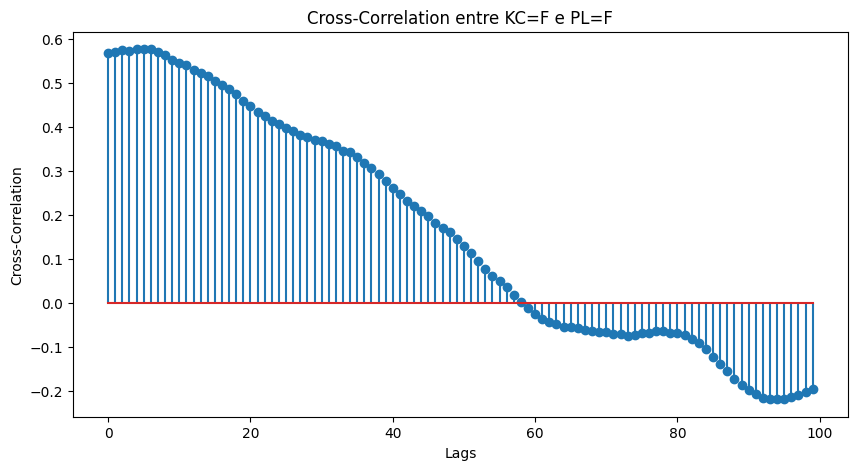

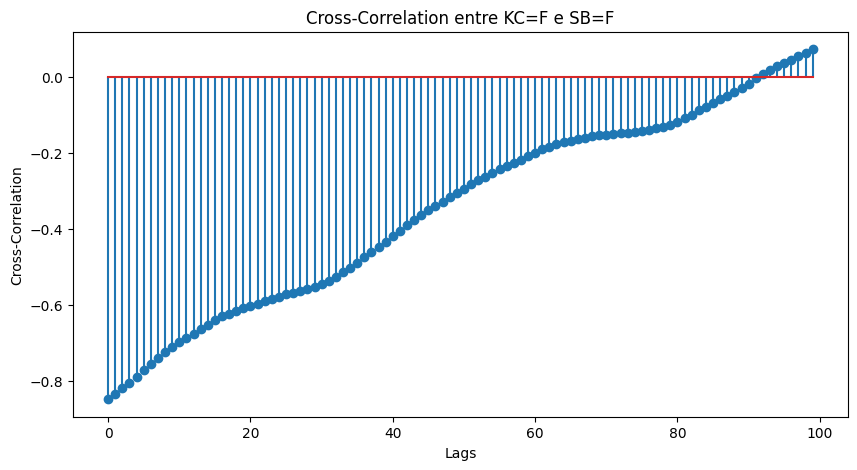

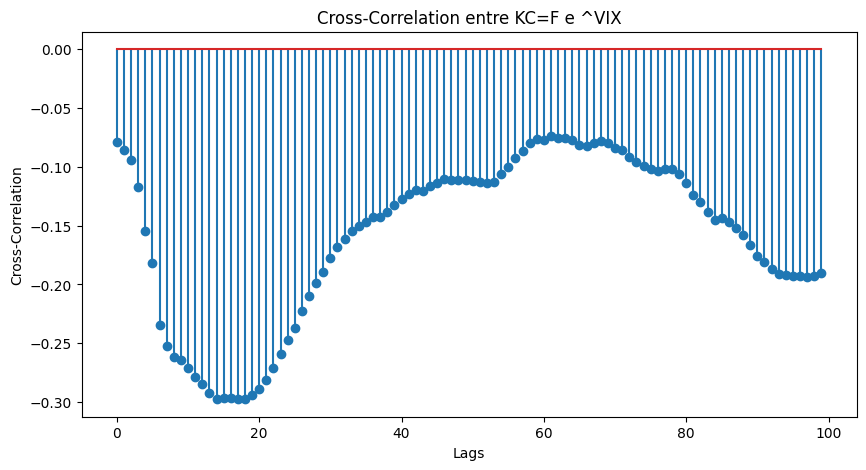

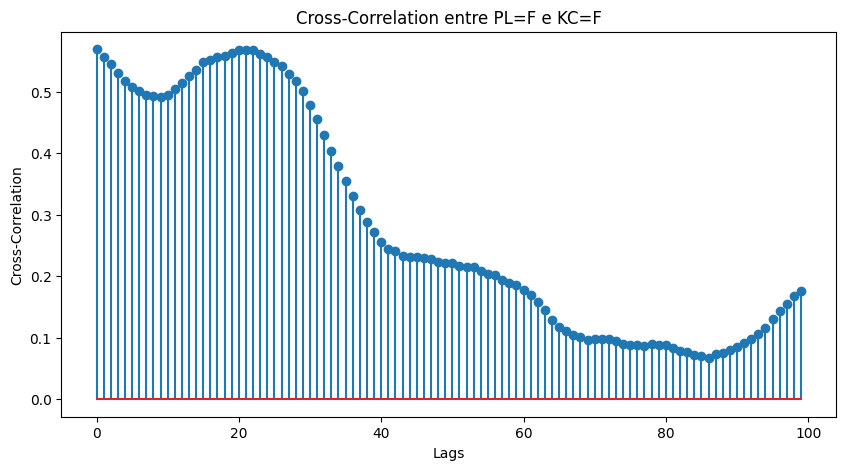

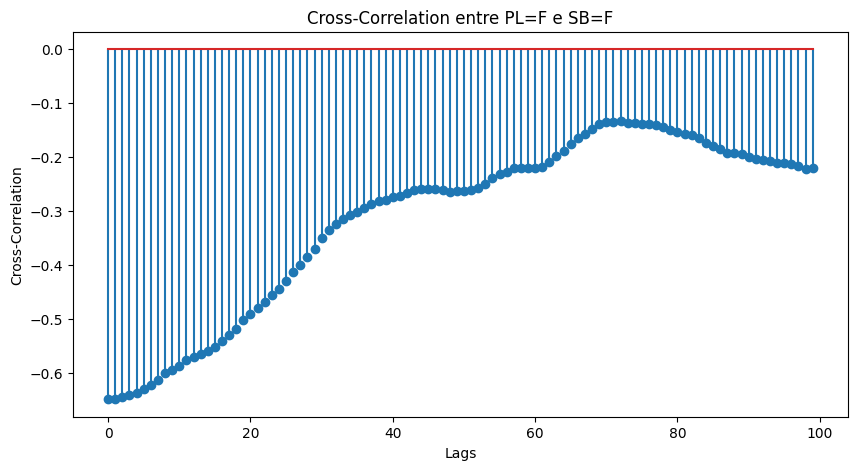

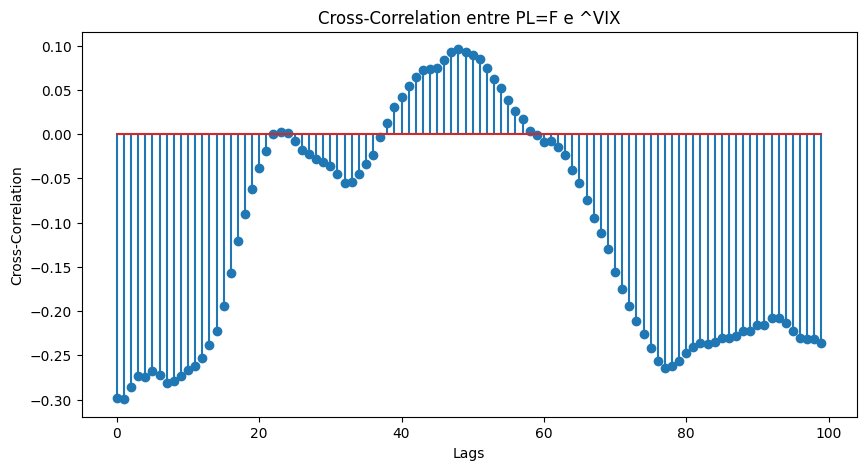

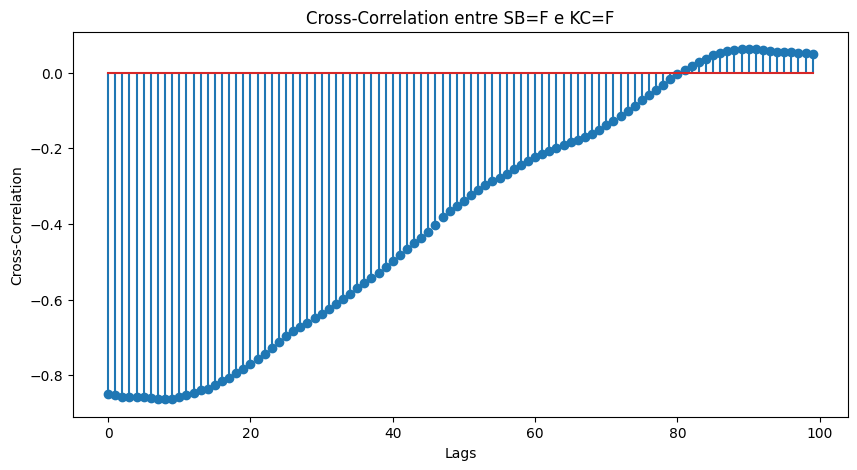

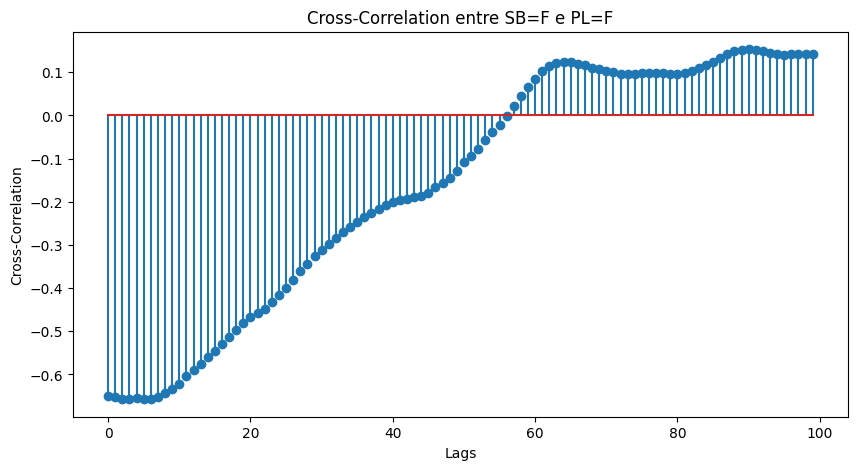

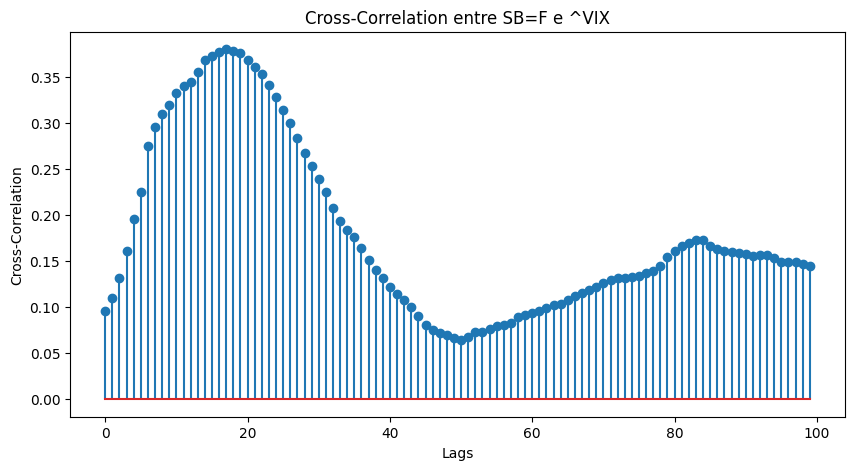

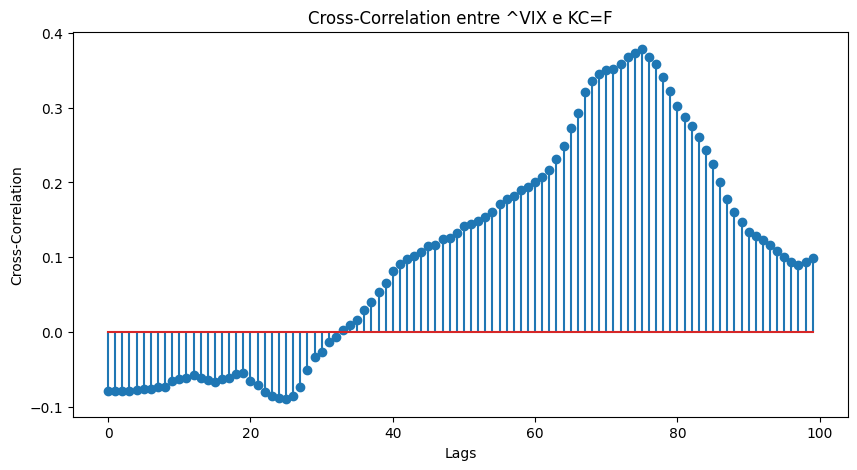

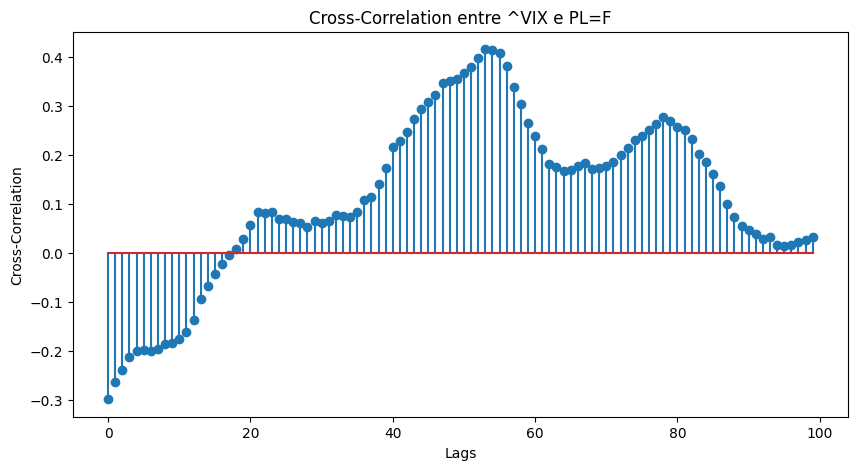

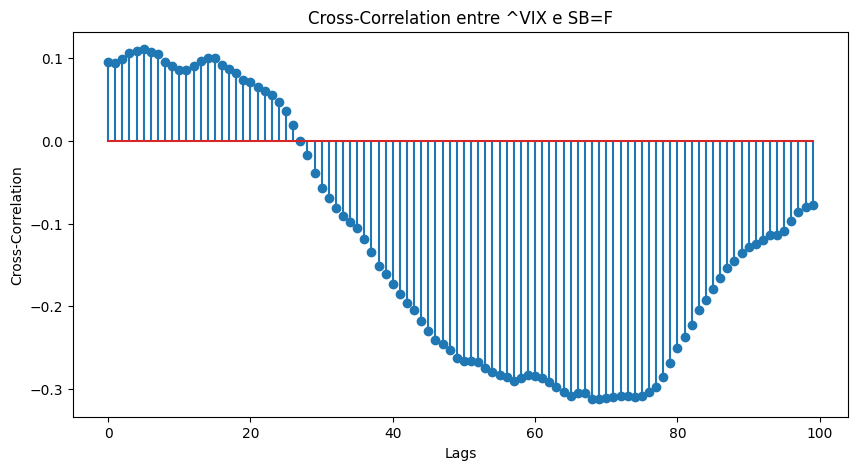

In [22]:
cross_correlation_analysis(data,'Close', 100)

## 5 - Transfer Entropy

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyinform.transferentropy import transfer_entropy

def transfer_entropy_analysis(data, price, lags):
    list_tickers = list(data[price].columns)  # Corrigido para pegar os nomes das colunas
    for serie1_name in list_tickers:
        for serie2_name in list_tickers:
            if serie1_name == serie2_name:
                continue
            else:
                yaxes = []
                xaxes = list(range(1, lags + 1))  # Lags começando de 1 até o número especificado

                for i in range(1, lags + 1):  # Correção no range para incluir o último valor
                    # Selecionar duas séries temporais de preços ajustados
                    X = data[price][serie1_name].pct_change().dropna().to_numpy()  # Retornos diários de serie1
                    Y = data[price][serie2_name].pct_change().dropna().to_numpy()  # Retornos diários de serie2

                    # Transformar as séries temporais em uma forma discreta (binning)
                    bins = np.histogram_bin_edges(X, bins='auto')  # Binning automático para discretização
                    X_binned = np.digitize(X, bins)  # Discretização da série X
                    Y_binned = np.digitize(Y, bins)  # Discretização da série Y

                    # Garantir que os valores discretizados são positivos (pyinform não aceita negativos)
                    X_binned -= X_binned.min()  # Ajusta o mínimo para 0
                    Y_binned -= Y_binned.min()

                    # Verifique se há valores negativos
                    assert np.all(X_binned >= 0), "X contém valores negativos após discretização"
                    assert np.all(Y_binned >= 0), "Y contém valores negativos após discretização"

                    # Calcular o Transfer Entropy de X para Y
                    te_xy = transfer_entropy(X_binned, Y_binned, k=i)
                    yaxes.append(te_xy)

                # Plotar os valores de Transfer Entropy para diferentes lags
                plt.figure(figsize=(10, 5))
                plt.plot(xaxes, yaxes, marker='o')
                plt.title(f'Transfer Entropy between {serie1_name} e {serie2_name}')
                plt.xlabel('Lags')
                plt.ylabel(f'TE [{serie1_name}] to [{serie2_name}]')
                plt.grid(True)
                plt.show()

# Exemplo de uso
# Assumindo que `data` é um DataFrame contendo preços de múltiplos ativos com o nome das colunas correspondendo aos tickers
# e que 'Adj Close' é a coluna de preços ajustados
# transfer_entropy_analysis(data, 'Adj Close', lags=5)


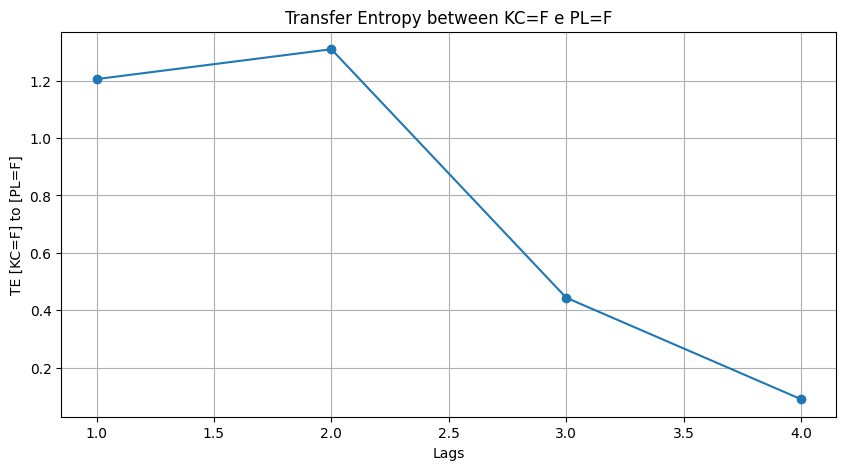

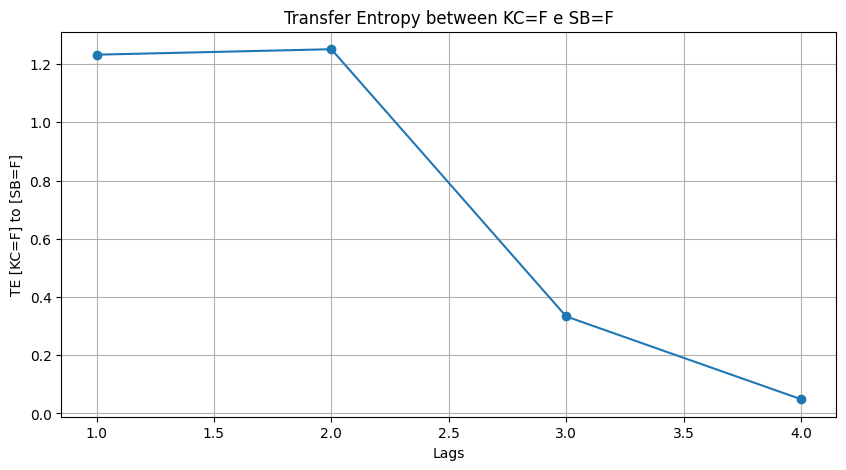

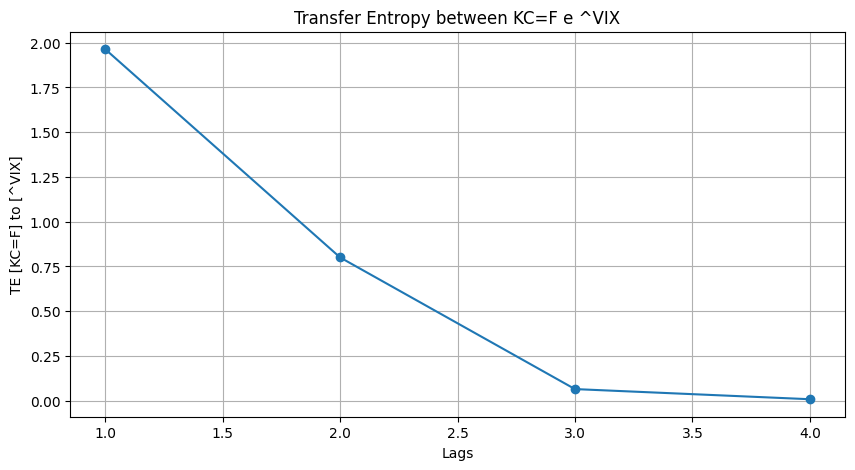

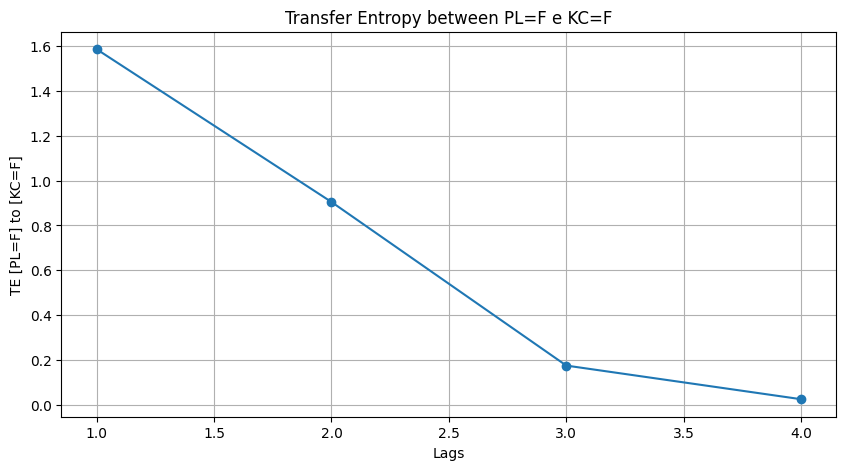

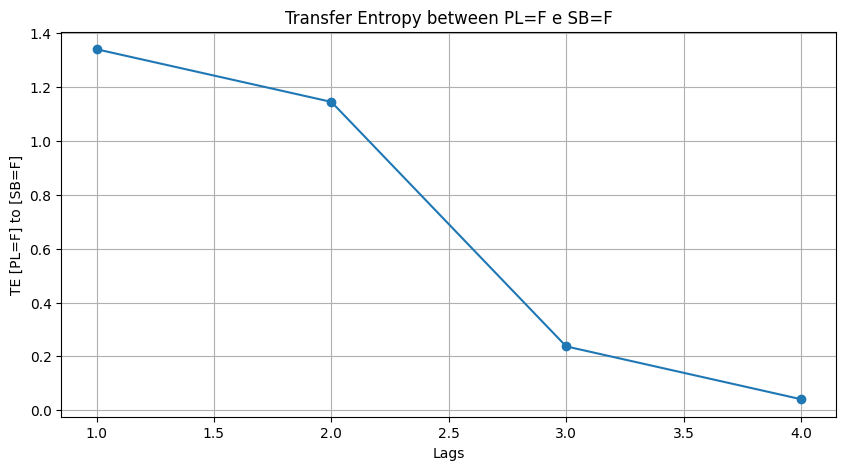

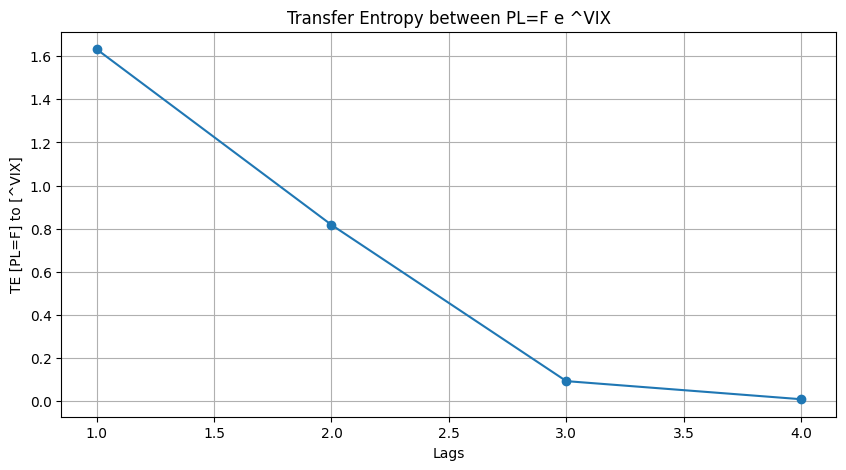

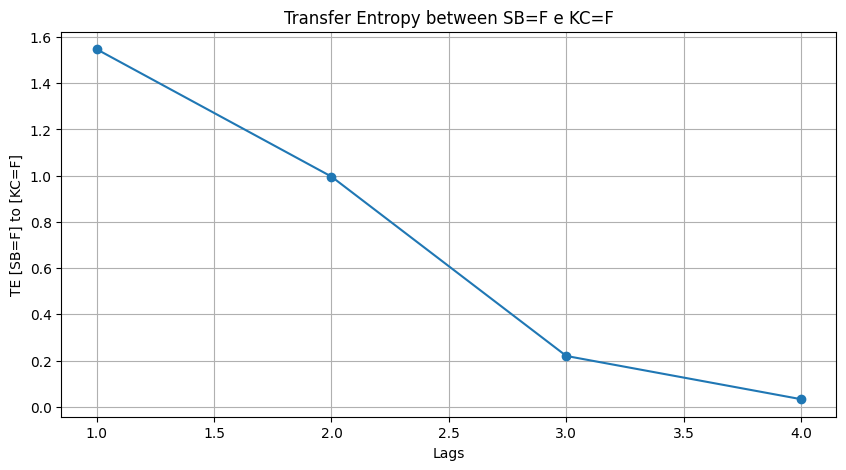

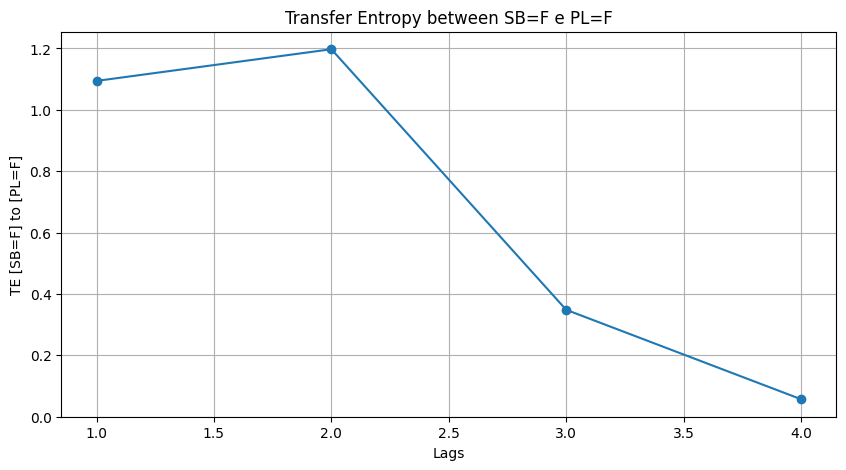

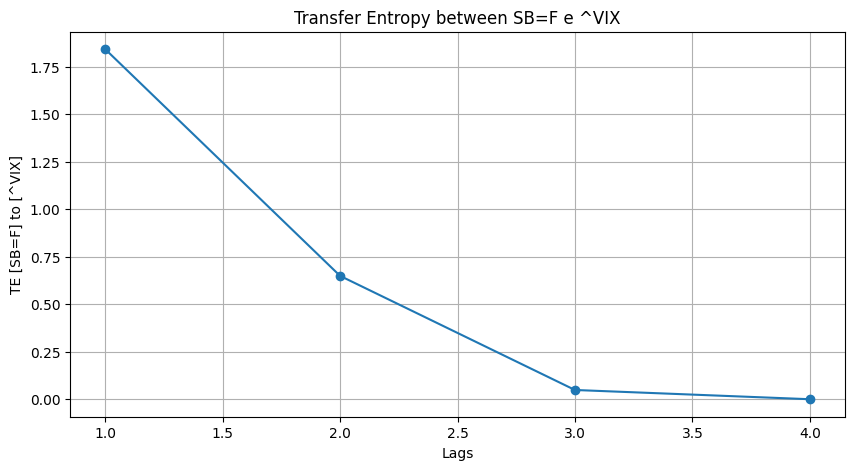

InformError: an inform error occurred - "memory allocation failed"

In [24]:
transfer_entropy_analysis(data, 'Close', 4)

In [ ]:


# Baixar dados financeiros usando yfinance
tickers = ["SB=F", "KC=F"]
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")['Adj Close']

# Assumindo que os dados estão em um DataFrame 'data'
# Selecionar duas séries temporais de preços ajustados
X = data['SB=F'].pct_change().dropna().to_numpy()  # Retornos diários de SB=F
Y = data['KC=F'].pct_change().dropna().to_numpy()  # Retornos diários de KC=F

# Transformar as séries temporais em uma forma discreta (binning)
bins = np.histogram_bin_edges(X, bins='auto')  # Binning automático para discretização
X_binned = np.digitize(X, bins)  # Discretização da série X
Y_binned = np.digitize(Y, bins)  # Discretização da série Y

# Garantir que os valores discretizados são positivos (pyinform não aceita negativos)
X_binned -= X_binned.min()  # Ajusta o mínimo para 0
Y_binned -= Y_binned.min()

# Verifique se há valores negativos
assert np.all(X_binned >= 0), "X contém valores negativos após discretização"
assert np.all(Y_binned >= 0), "Y contém valores negativos após discretização"

# Calcular o Transfer Entropy de X para Y
te_xy = transfer_entropy(X_binned, Y_binned, k=1)
print(f"Transfer Entropy de X para Y: {te_xy}")

[*********************100%%**********************]  2 of 2 completed

Transfer Entropy de X para Y: 1.9341156801041817
